# Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Loading Data Set

In [2]:
glass=pd.read_csv('glass.csv')
glass.head(20)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


# Checking NULL Value

In [3]:
df= pd.DataFrame(glass)
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# Data Visualization

In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


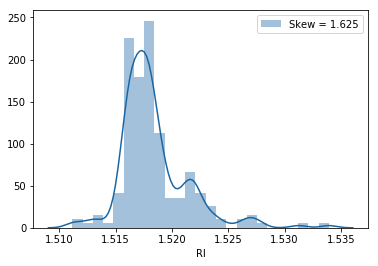

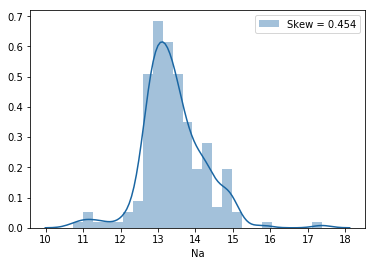

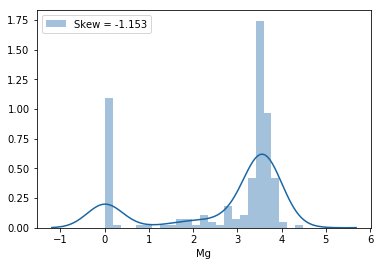

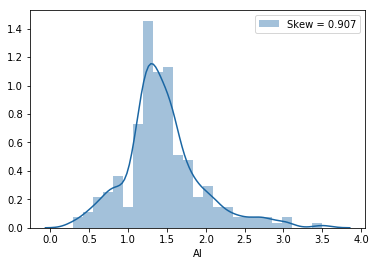

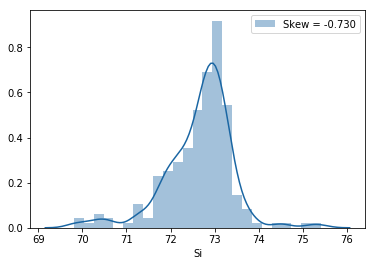

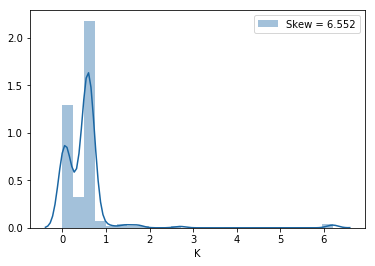

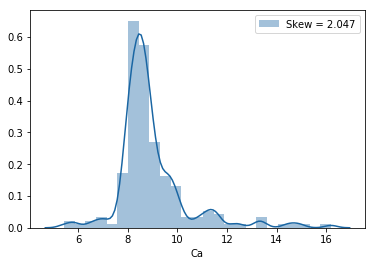

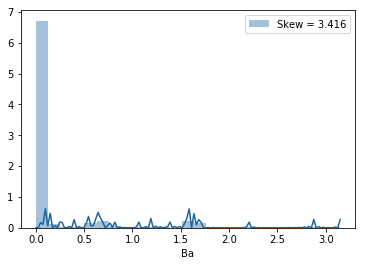

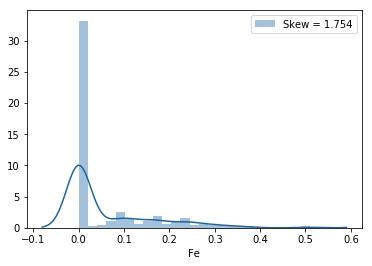

In [5]:
#metals used in glass

col = df.columns[:-1].tolist()
for i in col:
    sns.distplot(df[i], label='Skew = %.3f' %(df[i].skew()), bins= 25, color=(0.1,0.4,0.64))
    plt.legend(loc='best')
    plt.show()
    

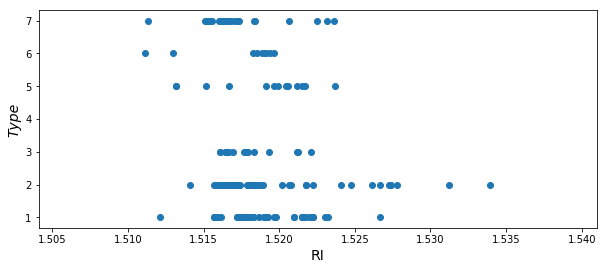

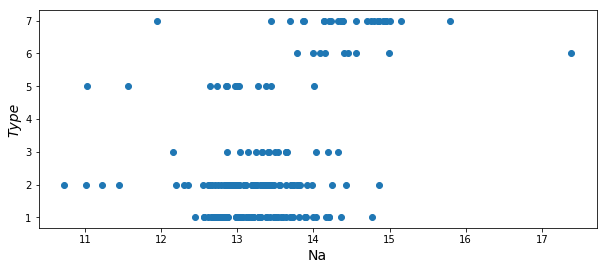

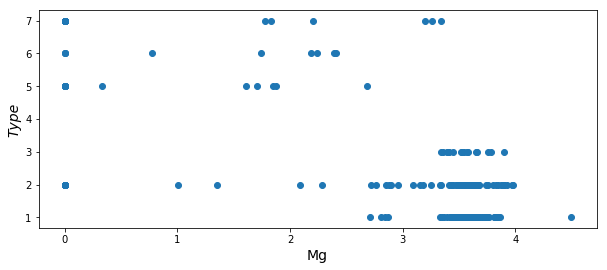

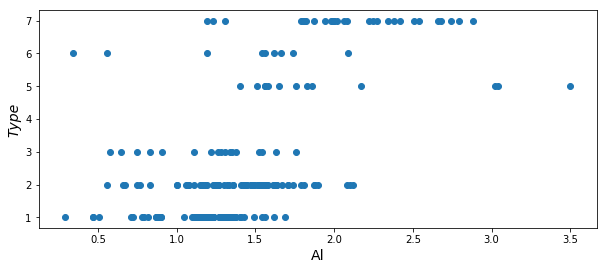

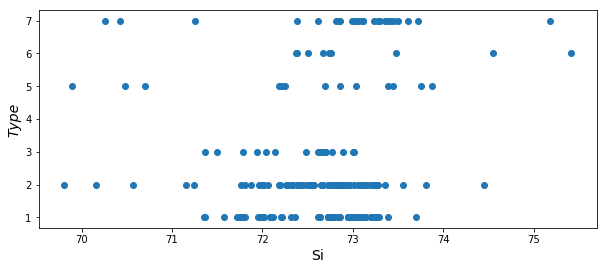

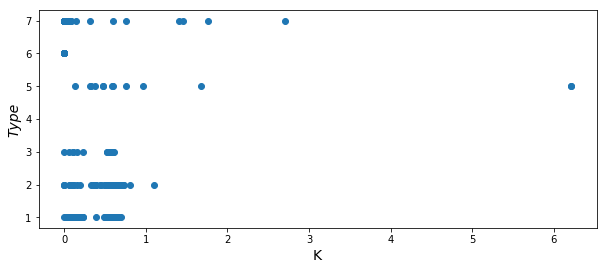

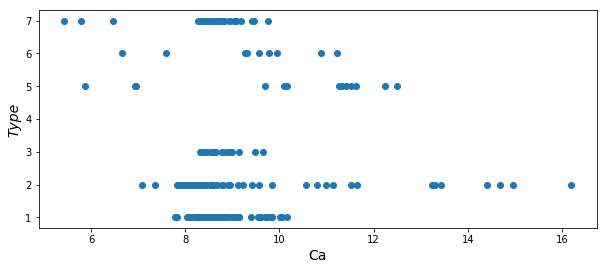

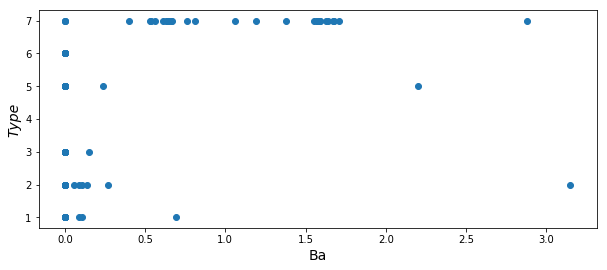

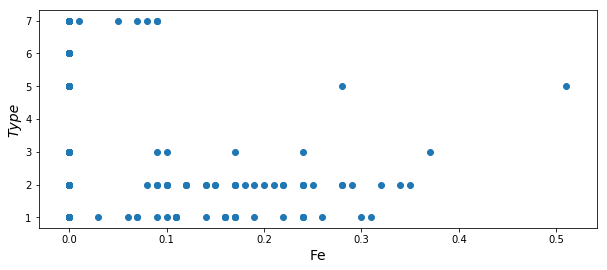

In [6]:
#metal used in each type of glass

for i in col:    
    plt.figure(figsize=(10,4))
    plt.scatter(df[i], df.Type)
    plt.xlabel(i , fontsize= 14)
    plt.ylabel('Type', fontsize= 14 , style='italic')

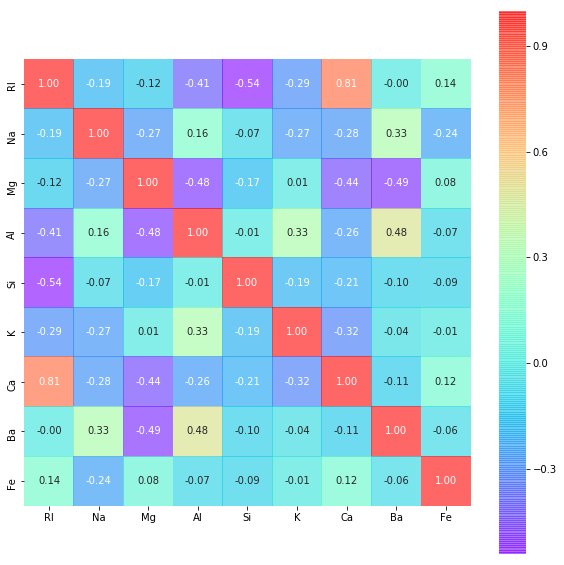

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df[col].corr() ,cbar=True ,square= True, annot=True ,annot_kws={'size':10},fmt= '.2f',alpha=0.6, xticklabels= col, yticklabels= col ,cmap='rainbow')

#There seems to be a strong positive correlation between RI and Ca. 
#This could be a hint to perform Principal component analysis in order to decorrelate some of the input features.

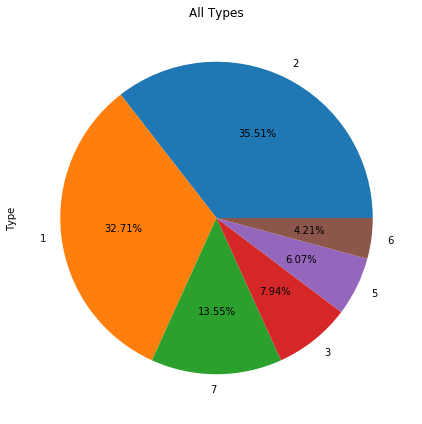

In [8]:
plt.figure(figsize = (7,10))
df.Type.value_counts().plot.pie(autopct= '%1.2f%%', title='All Types' )


#  Random Forest Model To predict Type

In [9]:
X=glass.drop('Type', axis=1)
Y=glass.Type

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=72 )
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
from sklearn.ensemble import RandomForestClassifier

group = RandomForestClassifier(n_estimators=200, random_state = 3)
group.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=3, verbose=0, warm_start=False)

In [12]:
Y_pred = group.predict(X_test)

df1 = pd.DataFrame( Y_pred,Y_test).reset_index()
df1.columns = ['Predicted value', 'Original value']
df1

,Predicted value,Original value
0,1,1
1,6,6
2,7,7
3,7,7
4,2,3
5,7,1
6,2,2
7,1,1
8,2,2
9,5,2


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix( Y_test,Y_pred)
cm

array([[19,  0,  0,  0,  0,  0],
       [ 0, 15,  1,  0,  0,  1],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  0, 10]])

In [14]:
accuracy_score( Y_test, Y_pred  )* 100

87.03703703703704